# Lab Session I: Matrix Approximation using SVD

You can make teams of 2 persons for this lab session. (En binôme)

In this Lab session, you will learn the utilisation of SVD, especially with low rank SVD. The following libraries are necessary (not only for this session):
* Numpy: a library for matrix manipulation
* Pandas: a library for data manipulation and management
* matplotlib: a poupular library for a visulisation
* Scipy: a library for scitific math 
* Scikit-learn: a popular library for machine learning 

You can install the environment through package and environment management systems, such as Anaconda(https://www.anaconda.com/),
or directly use online environment, such as Google Colab (https://colab.research.google.com/)
Use Python > 3.5 for some coding featues.



## 1. Construct of SVD: Get started with matrix manipulation

To learn using python for matrix manipulation, we firstly start with a simple utilisation with analytic SVD calculating. Complete the following skeleton. 

Let's start with a simple example:

In [1]:
import numpy as np

# Given a matrix A, calculate its SVD in an analytic way.
# The skeleton given below is in the form of method. You can also do it step by step as a sequential script firstly, 
# then integrate them into a method after every step returns wanted result.
# Start with a specific example: 

A = np.vstack([[1,0,1],[-2,1,0]])


Get the dimension m and n of the matrix A, with attribute "shape" (https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)

In [2]:
m, n = A.shape

Construct a symmetric matric ATA by multiplying A and A transpose. Refer to the manual for linear algebra operations (https://numpy.org/doc/stable/reference/routines.linalg.html)


In [3]:
ATA = np.dot(A.T, A)

Find the eigenvalues and eigenvectors of the matrix ATA by method numpy.linalg.eig(). (https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig)


In [4]:
vals, vecs = np.linalg.eig(ATA)

Reorder the eigenvalues in a decreasing way, put the values into a diagonal matrix D by multiplying with an identity matrix.
Reorder the eigenvectors corresponding to the eigenvalues, in order to compose the matrix P in the eigen decomposition of ATA

Hint 1: Use np.argsort(vals) to get the order index of each eigen value. Then, reorder the eigenvalues and eigenvectors with this index. 
(This is a trivial process. Take your time with reflexion.)

Hint 2: Use np.eye(n) to generate an identity matrix with size n.

Hint 3: Use np.vstack(tup) and np.hstack(tup) to stack a tuple of arrays (tup) vertically and horizentally. See examples in https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

In [5]:
sort_index = np.argsort(vals)[::-1]  # Sort in descending order

# Reorder the eigenvalues and eigenvectors
vals_sorted = vals[sort_index]
vecs_sorted = vecs[:, sort_index]

# Create the diagonal matrix D
D = np.diag(vals_sorted)

# Compose the matrix P
P = vecs_sorted

# V is equivalent to P transpose
V = P.copy()

Construct Matrix Sigma from the square root of D, with padded 0's to match shape of A. You can use np.vstack() or np.hstack() to pad the matrix

In [6]:
Sigma = np.zeros((m, n))
Sigma[:min(m, n), :min(m, n)] = np.sqrt(np.maximum(D[:min(m, n), :min(m, n)], 0))  # Take the square root of D, ensuring non-negative values


Now you have matrix V, which is equivalent to P transpose. You have matrix Sigma. There is only matrix U left to calculate.

(You can do that in an iterative way)

In [7]:
# Calculate U iteratively
U = np.zeros((m, m))
for i in range(m):
    U[:, i] = np.dot(A, V[:, i]) / Sigma[i, i]

print(U)

[[ 0.4472136   0.89442719]
 [-0.89442719  0.4472136 ]]


Write your calculation in a method. Be careful, you need to adapt your method to matrix with any dimensions.

In [8]:
def SVD_analytic(A):
    """Calculating SVD in analytic way
    Args: 
        A: ndarray, matrix to be decomposed
    Returns:
        (U, Sig, VT): tuple of three ndarrays. Representing the three matrix U Sigma and V transpose in SVD.
    """
    # Get the dimensions of A
    m, n = A.shape
    
    # Construct ATA
    ATA = np.dot(A.T, A)
    
    # Find the eigenvalues and eigenvectors of ATA
    vals, vecs = np.linalg.eig(ATA)
    
    # Reorder the eigenvalues and eigenvectors
    sort_index = np.argsort(vals)[::-1]  # Sort in descending order
    vals_sorted = vals[sort_index]
    vecs_sorted = vecs[:, sort_index]
    
    # Create the diagonal matrix D
    D = np.diag(vals_sorted)
    
    # Compose the matrix P
    P = vecs_sorted
    
    # V is equivalent to P transpose
    V = P.copy()
    
    # Construct Matrix Sigma from the square root of D, with padded 0's to match shape of A
    Sigma = np.zeros((m, n))
    Sigma[:min(m, n), :min(m, n)] = np.sqrt(np.maximum(D[:min(m, n), :min(m, n)], 0))  # Take the square root of D, ensuring non-negative values
    
    # Calculate U iteratively
    U = np.zeros((m, m))
    for i in range(m):
        U[:, i] = np.dot(A, V[:, i]) / Sigma[i, i]
    
    return (U, Sigma, V.T)

In [9]:
# To verify that your answer is correct. Print some simple Matrix and see the multiplication of their SVD components
A = np.vstack([[1,0,1],[-2,1,0]])
print(A)
U, S, VT = SVD_analytic(A)
print(U@S@VT)

[[ 1  0  1]
 [-2  1  0]]
[[ 1.00000000e+00 -4.29162278e-17  1.00000000e+00]
 [-2.00000000e+00  1.00000000e+00 -4.29162278e-17]]


In [10]:
# You can verify your solution with SVD implemented in Numpy, with the function np.linalg.svd()

U_, S_, V_ = np.linalg.svd(A)

# Noting that the results are usually obtained by approximation, you will not get precisely equivalent values from different methods. 
# To compare if two matrices A and B are approximately equivalent, use method np.allclose(A,B) (https://numpy.org/doc/stable/reference/generated/numpy.allclose.html)

print("U from np.linalg.svd():\n", U_)
print("Sigma from np.linalg.svd():\n", S_)
print("V from np.linalg.svd():\n", V_)

# Check if the matrices are approximately equal
print("U approximately equal:", np.allclose(U, U_))

# Pad np.diag(S_) with zeros to match the shape of Sigma
Sigma_ = np.zeros_like(Sigma)
Sigma_[:min(Sigma.shape), :min(Sigma.shape)] = np.diag(S_)

print("Sigma approximately equal:", np.allclose(Sigma, Sigma_))
print("V approximately equal:", np.allclose(V.T, V_))


U from np.linalg.svd():
 [[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]]
Sigma from np.linalg.svd():
 [2.44948974 1.        ]
V from np.linalg.svd():
 [[-9.12870929e-01  3.65148372e-01 -1.82574186e-01]
 [-3.73536832e-16  4.47213595e-01  8.94427191e-01]
 [-4.08248290e-01 -8.16496581e-01  4.08248290e-01]]
U approximately equal: False
Sigma approximately equal: True
V approximately equal: False


Now you have some basic notions on matrix manipulation with Python. Let's do some more advanced exercises with SVD.

## 2. Data compression with truncated SVD

Images are made up by pixels, which are essentially matrix. We will see how low rank SVD compresses an image.
A colorful image is usually represented by three matrix, respectively containing the color information of Red Green and Blue (RGB).
To simplify the data processing, monochrome image with greyscale is usually applied, represented by a single matrix.

To run the programme, you should put the image file at the same directory with this notebook.
If you are using Google Colab, put the image file at the root directory of your Colab project.

In [11]:
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt

# A function converting RBG to monochrone image.
img = image.imread("mona_lisa.jpg")


Now we illustrate the singuler values on each rank, and the information restrained with different number of rank.
The singuler values should be sorted in a descdent way, denoted by $S$ (the output of method np.linalg.svd() is in a such form by default.)
Given a rank $r$, the information restrained $IR$ is calculated by the cumulative sum of the singular values, represented by percentage. i.e.
$$
IR_r = \sum_{i=1}^{i=r}S[i] \times 100\%
$$

In [12]:
total_S = S.sum() # Used to calculate the percentage of cumulative sum
n_components = len(S) # The number of all possible ranks (full rank)
component_idx = range(1,  n_components + 1) # This variable is used for plotting
# 4. Implement the equation above to calculate retained information. 
# info_retained should be a 1D-array with the size of n_components
# hint: use method np.cumsum() https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
info_retained = np.cumsum(S) / total_S * 100

The codes below serve to illustrate the original image, singular values for each rank , as well as the cumulative percentage of information carried by singular vectors corresponding to different rank. 
You don't need to implement anything, but you must understand the everyline of the code, and then give your observations and remarks in a markdown block.

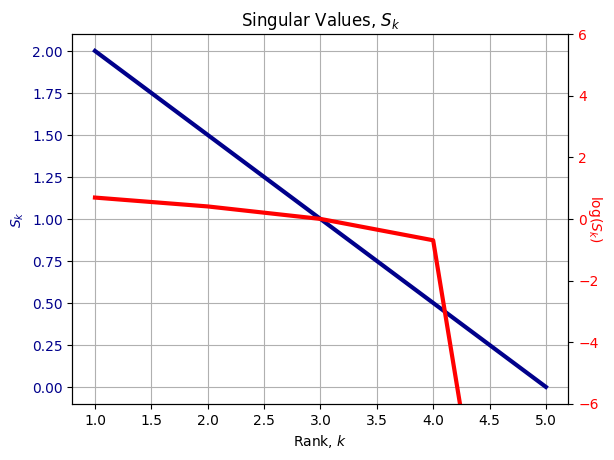

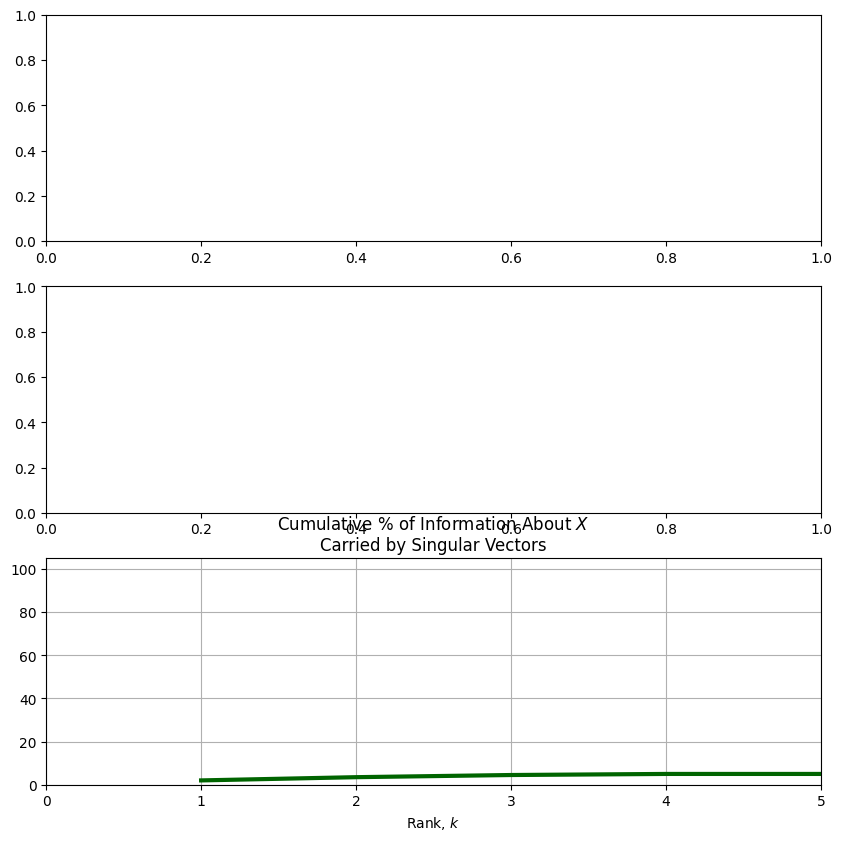

In [15]:
S = np.array([2.0, 1.5, 1.0, 0.5, 0])
component_idx = range(1, len(S) + 1)

plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$S_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $S_k$')

epsilon = 1e-10 
twax = plt.gca().twinx()
twax.plot(component_idx, np.log(S + epsilon), color='red', linewidth=3)
plt.ylabel('$\\log(S_k)$\n', color='red', rotation=270)
plt.tick_params(axis='y', labelcolor='red')
plt.ylim([-6, 6])

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[2].plot(component_idx, np.cumsum(S), color='darkgreen', linewidth=3)
axs[2].set_xlim(0, len(S))
axs[2].set_ylim([0, 105])
axs[2].set_xlabel("Rank, $k$")
axs[2].grid()
axs[2].set_title('Cumulative % of Information About $X$\nCarried by Singular Vectors')

plt.show()


### Your observation and remarks: (double click this block to modify)

Illustrate the compressed image, with selected ranks varying from 1 to 500 (for example, you can take ranks equaling to 1, 5, 10, 100, 200, 300)
The constructed image is still calculated by multiplying U S and V (transpose), but with rank number limited.


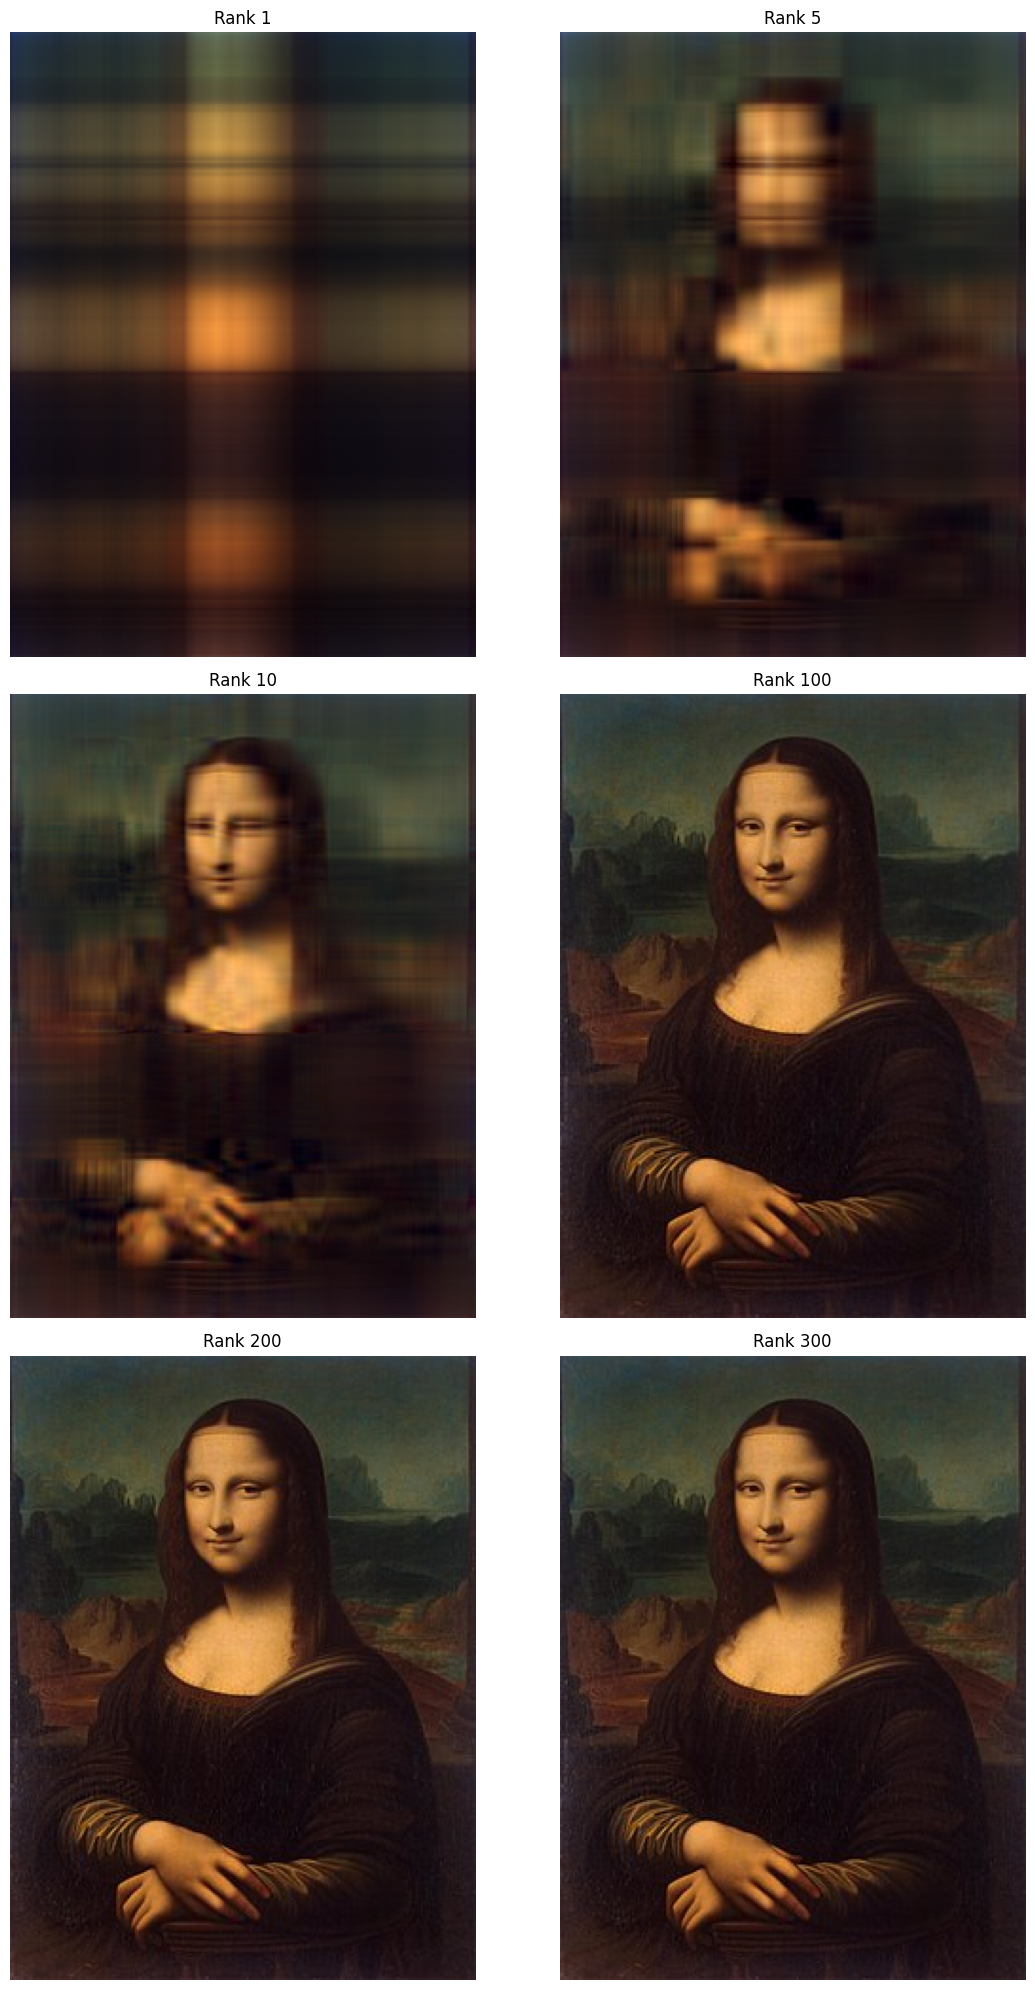

In [19]:
plt.figure(figsize=(12, 20))

# Check if the image is in the correct range (either 0-255 or 0-1)
if img.max() > 1:  # If pixel values are in the range [0, 255], normalize them
    img = img / 255.0

for i, rank in enumerate([1, 5, 10, 100, 200, 300]):
    
    # Initialize the compressed image placeholder
    img_compressed = np.zeros_like(img)

    # Perform SVD on each color channel (R, G, B)
    for c in range(3):  # Iterate over color channels
        U_, S_, VT_ = np.linalg.svd(img[:, :, c], full_matrices=False)  # SVD for each channel
        
        # Use only the top 'rank' components to compress each channel
        U_truncated = U_[:, :rank]
        S_truncated = np.diag(S_[:rank])
        VT_truncated = VT_[:rank, :]
        
        # Reconstruct the compressed image for each channel
        img_compressed[:, :, c] = np.dot(U_truncated, np.dot(S_truncated, VT_truncated))
    
    # Clip pixel values to ensure they're between 0 and 1
    img_compressed = np.clip(img_compressed, 0, 1)

    # Plot the compressed image
    plt.subplot(3, 2, i + 1)
    plt.title(f"Rank {rank}")
    plt.imshow(img_compressed)  # Display the RGB image
    plt.axis("off")

plt.tight_layout()
plt.show()


You may find that the quality of the compressed image is acceptable with a relatively low rank. This phenomenon is consistent with the plot of cumulative of information with low rank.
Now, calculate the compression rate with a given rank.

The compression rate is simply calculated by the whole size of matrix stored (U,S,V) divesed by the size of the matrix representing the original image

In [21]:
# 6. Write your method of compressing_rate(A, r), then calculate the compression rate with the rank selected above.
def compressing_rate(A, r):
    """
    Calculate the compressing rate of matrix A by SVD with rank limited to r.

    Args:
        A: ndarray, the original matrix
        r: integer, the value of rank
    Returns:
        cr: compression rate
    """
    m, n = A.shape  # Get the dimensions of the original matrix
    original_size = m * n  # Size of the original matrix
    compressed_size = m * r + r + r * n  # Size after SVD compression

    cr = original_size / compressed_size  # Calculate the compression rate
    return cr